In [13]:
from pandas import *
import numpy as np
import matplotlib.pyplot as plt
import math
import colorsys
import webcolors
from webcolors import rgb_to_name
from webcolors import *

from scipy.spatial import KDTree


In [2]:
# row data for dominant color
dominant_color_data_settler_3 = read_csv("G:\\.shortcut-targets-by-id\\1m8mQSGFIpYWyBBuka4kAy332A9fQSMBX\\digital_humanities\\Ergebnisse\\DominantColor\\Die_Siedler3\\Die_Siedler3_dominant_color_row_data.csv")
dominant_color_data_diablo_2 = read_csv("G:\\.shortcut-targets-by-id\\1m8mQSGFIpYWyBBuka4kAy332A9fQSMBX\\digital_humanities\\Ergebnisse\\DominantColor\\Diablo2\\Diablo2_dominant_color_row_data.csv")
dominant_color_data_elden_ring = read_csv("G:\\.shortcut-targets-by-id\\1m8mQSGFIpYWyBBuka4kAy332A9fQSMBX\\digital_humanities\\Ergebnisse\\DominantColor\\Elden_Ring\\Elden_Ring_dominant_color_row_data.csv")
dominant_color_data_half_life_2 = read_csv("G:\\.shortcut-targets-by-id\\1m8mQSGFIpYWyBBuka4kAy332A9fQSMBX\\digital_humanities\\Ergebnisse\\DominantColor\\Half_Life2\\Half_Life2_dominant_color_row_data.csv")
dominant_color_data_little_nightmares = read_csv("G:\\.shortcut-targets-by-id\\1m8mQSGFIpYWyBBuka4kAy332A9fQSMBX\\digital_humanities\\Ergebnisse\\DominantColor\\Little_Nightmares\\Little_Nightmares_dominant_color_row_data.csv")
dominant_color_data_nfsmw = read_csv("G:\\.shortcut-targets-by-id\\1m8mQSGFIpYWyBBuka4kAy332A9fQSMBX\\digital_humanities\\Ergebnisse\\DominantColor\\NFSMW\\NFSMW_dominant_color_row_data.csv")
dominant_color_data_starcraft_2 = read_csv("G:\\.shortcut-targets-by-id\\1m8mQSGFIpYWyBBuka4kAy332A9fQSMBX\\digital_humanities\\Ergebnisse\\DominantColor\\Starcraft2\\Starcraft2_dominant_color_row_data.csv")
dominant_color_data_super_mario_world = read_csv("G:\\.shortcut-targets-by-id\\1m8mQSGFIpYWyBBuka4kAy332A9fQSMBX\\digital_humanities\\Ergebnisse\\DominantColor\\Super_Mario_World\\Super_Mario_World_dominant_color_row_data.csv")

# output folder for dominant color figures
output_path = "G:\\.shortcut-targets-by-id\\1m8mQSGFIpYWyBBuka4kAy332A9fQSMBX\\digital_humanities\\Ergebnisse\\DominantColor\\Figures_Paper\\"

In [4]:
# get rgb color values from the row data for the game
def getDominantColorValuesArr(row_data_path):
    color_values = row_data_path['dominatColor']
    color_values_arr = []
 
    for i in color_values:
        color_value = tuple(float(num) for num in i.replace('(', '').replace(')', '').replace('...', '').split(', '))
        color_values_arr.append(color_value)

    dominant_color_values_arr = tuple(tuple(map(int, tup)) for tup in color_values_arr)
    
    return dominant_color_values_arr

In [9]:
# get rgb color values from the row data for the game
def getDominantColorValuesArrPieChart(row_data_path):
    color_values = row_data_path['dominatColor']
    color_values_arr = []
 
    for i in color_values:
        color_value = tuple(float(num) for num in i.replace('(', '').replace(')', '').replace('...', '').split(', '))
        color_value = list(color_value)
        color_values_arr.append(color_value)

    #dominant_color_values_arr = tuple(tuple(map(int, tup)) for tup in color_values_arr)
    
    return color_values_arr

In [36]:
settler_values = getDominantColorValuesArr(dominant_color_data_settler_3)
diablo_values = getDominantColorValuesArr(dominant_color_data_diablo_2)
elden_ring_values = getDominantColorValuesArr(dominant_color_data_elden_ring)
half_life_values = getDominantColorValuesArr(dominant_color_data_half_life_2)
little_nightmares_values = getDominantColorValuesArr(dominant_color_data_little_nightmares)
nfsmw_values = getDominantColorValuesArr(dominant_color_data_nfsmw)
starcraft_values = getDominantColorValuesArr(dominant_color_data_starcraft_2)
mario_values = getDominantColorValuesArr(dominant_color_data_super_mario_world)

In [37]:
settler_values = getDominantColorValuesArrPieChart(dominant_color_data_settler_3)
print(settler_values)

[[245.0, 105.0, 28.0], [41.0, 48.0, 21.0], [38.0, 43.0, 16.0], [6.0, 9.0, 9.0], [6.0, 8.0, 9.0], [6.0, 8.0, 9.0], [28.0, 32.0, 15.0], [45.0, 52.0, 20.0], [46.0, 52.0, 20.0], [33.0, 39.0, 22.0], [34.0, 41.0, 21.0], [16.0, 23.0, 12.0], [31.0, 41.0, 15.0], [33.0, 44.0, 16.0], [33.0, 44.0, 15.0], [5.0, 7.0, 9.0], [22.0, 32.0, 14.0], [28.0, 35.0, 14.0], [6.0, 9.0, 9.0], [5.0, 7.0, 9.0], [5.0, 7.0, 9.0], [43.0, 51.0, 16.0], [42.0, 51.0, 15.0], [43.0, 51.0, 15.0], [43.0, 51.0, 16.0], [44.0, 51.0, 17.0], [51.0, 58.0, 18.0], [18.0, 27.0, 13.0], [8.0, 12.0, 10.0], [5.0, 7.0, 9.0], [9.0, 16.0, 11.0], [10.0, 18.0, 11.0], [24.0, 34.0, 14.0], [25.0, 35.0, 14.0], [30.0, 41.0, 15.0], [8.0, 11.0, 9.0], [20.0, 29.0, 14.0], [25.0, 34.0, 15.0], [27.0, 36.0, 16.0], [31.0, 41.0, 17.0], [13.0, 17.0, 13.0], [15.0, 23.0, 16.0], [16.0, 24.0, 16.0], [10.0, 14.0, 13.0], [11.0, 15.0, 13.0], [11.0, 15.0, 13.0], [12.0, 15.0, 13.0], [179.0, 179.0, 150.0], [179.0, 178.0, 148.0], [15.0, 16.0, 13.0], [15.0, 19.0, 14.0],

In [17]:
def generateColorBarsFigure():
    figure, position = plt.subplots(8,1)
    figure.set_size_inches(10.5, 35)
    #figure(figsize=(8, 6), dpi=80)

    # Settler 3
    position[0].imshow([[settler_values[i] for i in range(len(settler_values))]], extent=[0,len(settler_values),0,len(settler_values)/4], aspect='equal')
    position[0].set_title("Settler 3", fontsize= 12, pad=10)
    position[0].set_yticks([])
    #position[0].set_xticks([])
    position[0].set_xlabel("frame")

    # Diablo 2
    position[1].imshow([[diablo_values[i] for i in range(len(diablo_values))]], extent=[0,len(diablo_values),0,len(diablo_values)/4], aspect='equal')
    position[1].set_title("Diablo 2", fontsize= 12, pad=10)
    position[1].set_yticks([])
    #position[1].set_xticks([])
    position[1].set_xlabel("frame")

    # Elden Ring
    position[2].imshow([[elden_ring_values[i] for i in range(len(elden_ring_values))]], extent=[0,len(elden_ring_values),0,len(elden_ring_values)/4], aspect='equal')
    position[2].set_title("Elden Ring", fontsize= 12, pad=10)
    position[2].set_yticks([])
    #position[2].set_xticks([])
    position[2].set_xlabel("frame")

    # Half Life 2
    position[3].imshow([[half_life_values[i] for i in range(len(half_life_values))]], extent=[0,len(half_life_values),0,len(half_life_values)/4], aspect='equal')
    position[3].set_title("Half Life 2", fontsize= 12, pad=10)
    position[3].set_yticks([])
    #position[3].set_xticks([])
    position[3].set_xlabel("frame")

    # Little Nighmares
    position[4].imshow([[little_nightmares_values[i] for i in range(len(little_nightmares_values))]], extent=[0,len(little_nightmares_values),0,len(little_nightmares_values)/4], aspect='equal')
    position[4].set_title("Little Nightmares", fontsize= 12, pad=10)
    position[4].set_yticks([])
    #position[4].set_xticks([])
    position[4].set_xlabel("frame")

    # Need for Speed Most Wanted
    position[5].imshow([[nfsmw_values[i] for i in range(len(nfsmw_values))]], extent=[0,len(nfsmw_values),0,len(nfsmw_values)/4], aspect='equal')
    position[5].set_title("Need for Speed Most Wanted", fontsize= 12, pad=10)
    position[5].set_yticks([])
    #position[5].set_xticks([])
    position[5].set_xlabel("frame")

    # Starcraft 2
    position[6].imshow([[starcraft_values[i] for i in range(len(starcraft_values))]], extent=[0,len(starcraft_values),0,len(starcraft_values)/4], aspect='equal')
    position[6].set_title("Starcraft 2", fontsize= 12, pad=10)
    position[6].set_yticks([])
    #position[6].set_xticks([])
    position[6].set_xlabel("frame")

    # Super Mario World
    position[7].imshow([[mario_values[i] for i in range(len(mario_values))]], extent=[0,len(mario_values),0,len(mario_values)/4], aspect='equal')
    position[7].set_title("Need for Speed Most Wanted", fontsize= 12, pad=10)
    position[7].set_yticks([])
    #position[7].set_xticks([])
    position[7].set_xlabel("frame")


    #plt.show()

    plt.savefig(f"{output_path}dominant_color_barcodes_figure.svg", dpi=100, format='svg')

In [38]:
def convert_rgb_to_names(rgb_tuple):
    
    # a dictionary of all the hex and their respective names in css3
    css3_db = webcolors.CSS3_HEX_TO_NAMES
    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)
    return names[index]

In [58]:
def getColorPercentage(ouccrence, color_array):
    percentage = int(ouccrence / len(color_array) * 100)

    if percentage > 1:
        return str(percentage) + " %"
    else:
        return str("< 1 %")

darkslategray
black
darkolivegreen
peru
darkcyan
['darkslategray', 'black', 'darkolivegreen', 'peru', 'darkcyan']
[6531, 5724, 2722, 84, 70]
['darkslategray (42 %)', 'black (37 %)', 'darkolivegreen (17 %)', 'peru (< 0 %)', 'darkcyan (< 0 %)']


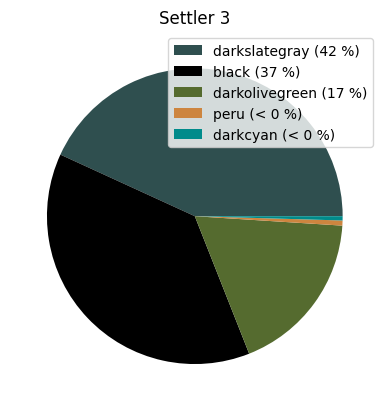

In [64]:
color_arr = []
color_arr_final = []
filler_arr = []
labels_arr = []

def step (rgb, repetitions=1):
    r,g,b = rgb
    #color_arr.append('#{:02x}{:02x}{:02x}'.format(int(r), int(g), int(b)))
    lum = math.sqrt( .241 * r + .691 * g + .068 * b )
    h, s, v = colorsys.rgb_to_hsv(r,g,b)
    h2 = int(h * repetitions)
    lum2 = int(lum * repetitions)
    v2 = int(v * repetitions)
    return (h2, lum, v2)


#settler_values.sort()
#settler_values.sort(key=lambda rgb: colorsys.rgb_to_hsv(*rgb)    )
settler_values.sort(key=lambda rgb: step(rgb,8))
settler_values_pie_chart_tuples = tuple(map(tuple, settler_values))
settler_values_pie_chart_tuples_int = tuple(tuple(map(int, tup)) for tup in settler_values_pie_chart_tuples)

#print(settler_values_pie_chart_tuples_int)

#test_array = []
#print(color_arr)

filter_arr = color_arr

for i in settler_values:
    #test_array.append(1)
    try:
        filter_arr.append(rgb_to_name(i, spec='css3'))
        #filler_arr.append(1)
    except:
        filter_arr.append(convert_rgb_to_names(i))
        #filler_arr.append(1)
filter_arr.sort()

#print(len(color_arr))
#print(len(filler_arr))
#print(color_arr)

for x in range(5):
    
    #most_freq_color = np.bincount(color_arr).argmax()
    unique,pos = np.unique(filter_arr,return_inverse=True)
    counts = np.bincount(pos)
    maxpos = counts.argmax() 


    print(unique[maxpos])
    most_freq_color = unique[maxpos]
    
    #unique, counts = np.unique(settler_values, return_counts=True)
    #filler_arr.append(np.count_nonzero(color_arr == most_freq_color))
    filler_arr.append(counts[maxpos])
    color_arr_final.append(most_freq_color)
    labels_arr.append(str(most_freq_color) + " (" + getColorPercentage(counts[maxpos], color_arr) + ")")
    #color_arr.remove(most_freq_color)
    
    filter_arr = [x for x in filter_arr if x != most_freq_color]

    


print(color_arr_final)
print(filler_arr)
print(labels_arr)
    
   
    
    #print(named_color)



#plt.imshow([[settler_values[i] for i in range(len(settler_values))]], extent=[0,len(settler_values),0,1], aspect='auto')
#plt.pie(color_arr)

patches, texts = plt.pie(filler_arr, colors=color_arr_final)
plt.legend(patches, labels_arr, loc="best")
plt.title("Settler 3")
plt.show()


In [ ]:
generateColorBarsFigure()